# Assignment 1

All required code is a single line. The length of your response for questions that require identification and/or interpretation will not be considered in evaluation. For example, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. 

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Question 1: Simple Linear Regression 

Let's set up our workspace and use the `Boston` dataset in the `ISLP` library. Print `Boston` to learn more about the dataset.

In [1]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Import specific objects
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [2]:
# Load the "Boston" dataset using the "load_data" function from the ISLP package
Boston = load_data('Boston')

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ What are the `medv` and `dis` variables being plotted? (Hint: review this [link](https://islp.readthedocs.io/en/latest/datasets/Boston.html))

medv is median value of owner-occupied homes in $1000s and dis is weighted mean of distances to five Boston employment centres.

_(ii)_ What concept ‘defines’ the plotted line?
The concept that defines the plotted line is called the regression line by least squares method.

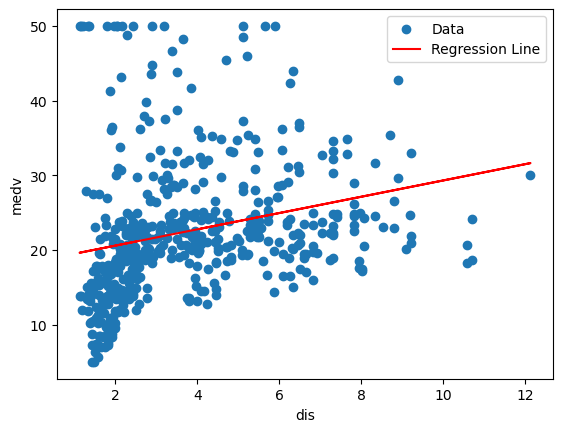

In [3]:
# Extract the variables
medv = Boston['medv'].values.reshape(-1, 1)
dis = Boston['dis'].values.reshape(-1, 1)

# Plot data
plt.scatter(dis, medv, label='Data')
plt.xlabel('dis')
plt.ylabel('medv')

# Fit a linear regression model
lm = LinearRegression()
lm.fit(dis, medv)

# Plot the regression line
plt.plot(dis, lm.predict(dis), color='red', label='Regression Line')

# Add labels and legend
plt.xlabel('dis')
plt.ylabel('medv')
plt.legend()

# Show the plot
plt.show()

Consider the variables plotted above. In the context of the `Boston` dataset:

_(iii)_ What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?
Null hypothesis (H0) will imply that there is no relationship between dis and medv. The slope of the line is zero. The alternative hypothesis (H1) is when there is a relationship between dis and medv. The slope will not be zero.


_(iv)_ Now, let’s fit a simple regression model, using the general syntax `sm.OLS()` and `model.fit()`. As above, use `medv` as the response variable Y, and `dis` as the predictor variable X. (Hint: use the syntax `sm.add_constant` with the appropriate argument).

In [13]:
# Add your code here
# Extract the response and fit the model
y = Boston['medv']
X = Boston['dis']

# Add a constant to the predictor variable
X = sm.add_constant(dis)

model = sm.OLS(y, X)
results = model.fit()

# Summarize results
summarize(results)

c:\Users\adith\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


,coef,std err,t,P>|t|
const,18.3901,0.817,22.499,0.0
x1,1.0916,0.188,5.795,0.0


In [16]:
# Your answer here
conf_intervals = results.conf_int()
print("Confidence intervals")
print(conf_intervals)

Confidence intervals
               0          1
const  16.784179  19.995997
x1      0.721509   1.461717


Review your model output to answer the following questions (Hint: use the `summary` and `conf_int` functions):    
_(v)_ What are the _coefficient estimates_ for $B_0$ (intercept) and $B_1$ (slope)?

$B_0$ (intercept) = 18.39 and $B_1$ (slope) = 1.092

_(vi)_ What are the _standard errors_ for $B_0$ and $B_1$?

$B_0$ = 0.817 and $B_1$ = 0.188

_(vii)_ What are the _confidence intervals_ for $B_0$ and $B_1$?

$B_0$ = [16.784 ; 19.996] and $B_1$ = [0.722 ; 1.462]



Now, let's interpret the model output.  
_(viii)_ Is the model a good fit? (Hint: review $R^2$)  

No. $R^2$ is 0.062, which is not a good fit.

_(ix)_ Do we reject the (implied) null hypothesis? Why or why not? (Hint: review model $F$ statistic, $p$ value).  

We should reject the null hypothesis. The Prob (F-statistic) is 1.21e-08, which is significantly lower than than 0.05.

In [15]:
# Your answer here
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        09:52:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

### Question 2: Multiple Linear Regression 

We'll continue to use the `Boston` dataset for this question.

_(i)_ Fit a multiple linear regression, with two predictor variables: $X_1$ is `dis`, and $X_2$ is `rm`. As before, keep `medv` as the response variable Y. (Hint: use the syntax `sm.add_constant` with the appropriate arguments).

In [18]:
# Add your code here

y = Boston['medv']
x1 = Boston['dis']
x2 = Boston['rm']

# Combine the predictor variables
X = np.column_stack((x1, x2))

# Add a constant to the predictor variables
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X)
results = model.fit()

print(summarize(results))

# Display summary
print( results.summary())

          coef  std err       t  P>|t|
const -34.6361    2.621 -13.212  0.000
x1      0.4888    0.141   3.459  0.001
x2      8.8014    0.424  20.780  0.000
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           1.84e-75
Time:                        10:07:56   Log-Likelihood:                -1667.1
No. Observations:                 506   AIC:                             3340.
Df Residuals:                     503   BIC:                             3353.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|

c:\Users\adith\miniconda3\envs\dsi_participant\lib\site-packages\ISLP\models\__init__.py:49: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  results_table = pd.read_html(tab.as_html(),


_(ii)_ In the context of the `Boston` dataset, state the null and alternative hypotheses.
Null hypothesis (H0) will imply that there is no relationship between dis and medv and rm and medv. The slope of the line is zero. The alternative hypothesis (H1) is when there is a relationship between dis and medv and rm and medv. The slope will not be zero.

_(iii)_ Review the model output, using `summary()`. Does it appear that both `dis` and `rm` are predictive of `medv`? How did you determine this?

p-values for both predictors are less than 0.05. This means that both dis and rm are significant predictors of medv.

_(iv)_ We can use the inbuilt `sm.graphics.plot_regress_exog` function to generate helpful diagnostic plots (Hint: provide `plot_regress_exog` with the multiple regression model). Review the first generated plot, 'Residuals vs. Fitted'. Which observations are outliers? What impact might outliers have on our model?

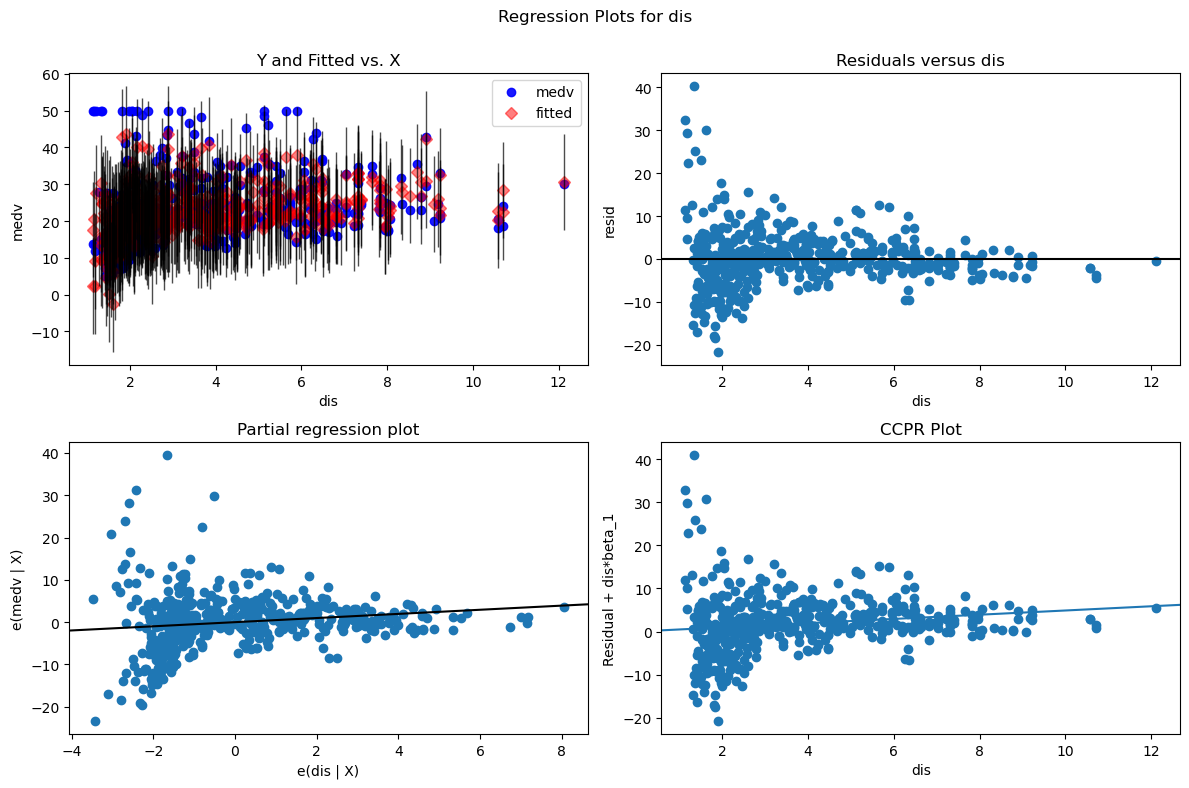

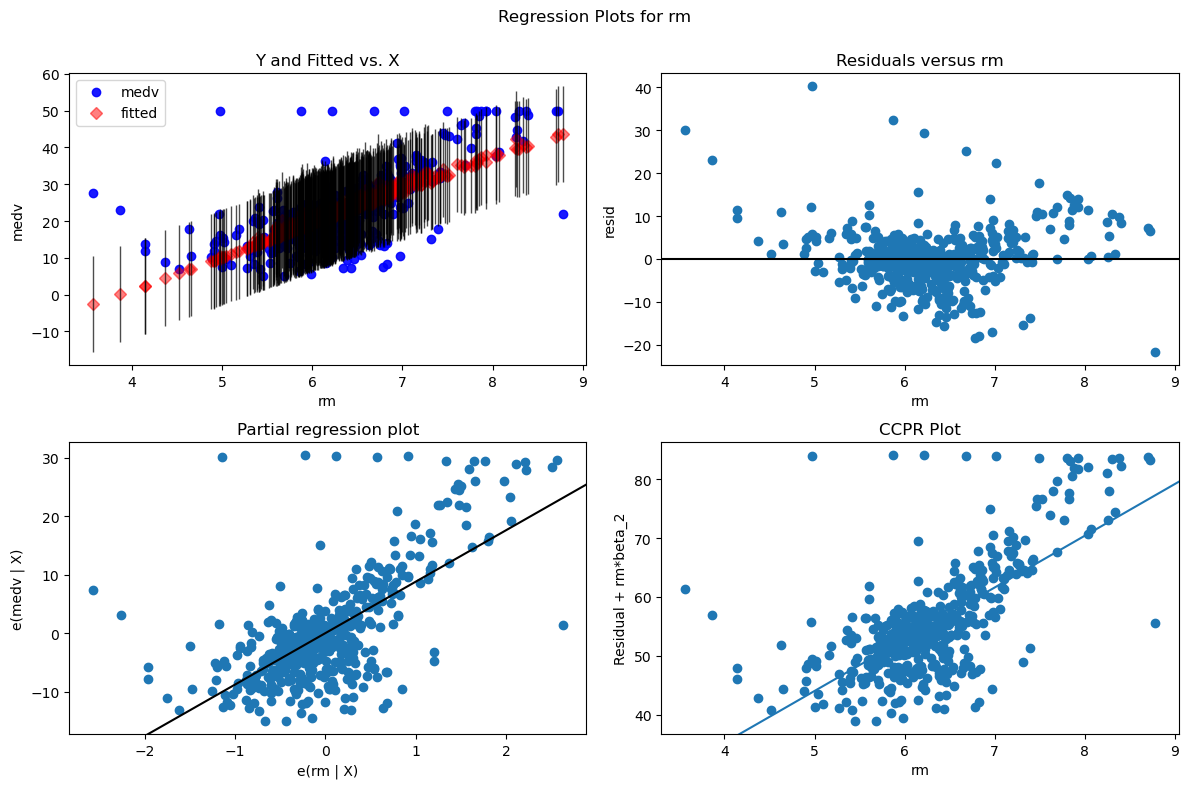

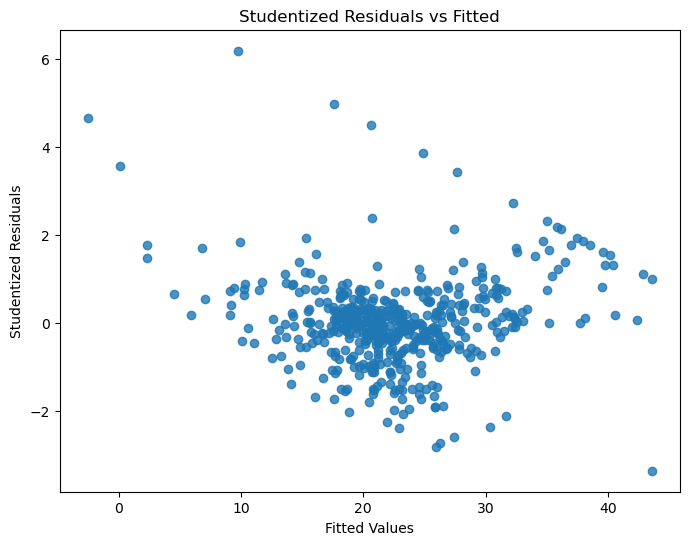

In [22]:
# Add your code here

# Define the model using formula
model = sm.OLS.from_formula('medv ~ dis + rm', data=Boston)
result = model.fit()

# Plot diagnostic plots for 'dis'
fig_dis = sm.graphics.plot_regress_exog(result, 'dis', fig=plt.figure(figsize=(12, 8)))
plt.show()

# Plot diagnostic plots for 'rm'
fig_rm = sm.graphics.plot_regress_exog(result, 'rm', fig=plt.figure(figsize=(12, 8)))
plt.show()

# Additional diagnostic plots Studentized Residuals vs. Fitted Values Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.scatter(result.fittedvalues, result.get_influence().resid_studentized_internal, alpha=0.8)
ax.set_xlabel('Fitted Values')
ax.set_ylabel('Studentized Residuals')
ax.set_title('Studentized Residuals vs Fitted')
plt.show()

_(v)_ Fit a second model, this time including an interaction between the two predictor variables. Is there an interaction? (Hint: add a variable `x1 * x2` where `x1` and `x2` are the predictor variables). State an interpretation of the interaction, in the context of the `Boston` dataset, in one or two sentences.

There is a significant interaction between dis and rm as p (f-statistic) is extremely low. dis and rm also have and a positive coefficient (0.9855). The intepretation of this is that homes with more rooms gain even more value when located further away from employment centers.

In [25]:
# Add your code here

model = sm.OLS.from_formula('medv ~ dis * rm', data=Boston)
result = model.fit()

# Print summary of regression
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     178.7
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           8.37e-79
Time:                        10:26:55   Log-Likelihood:                -1656.5
No. Observations:                 506   AIC:                             3321.
Df Residuals:                     502   BIC:                             3338.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -15.2533      4.895     -3.116      0.0

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Simple Linear Regression - Standard errors for $B_0$ and $B_1$|The standard errors are correct.|The standard errors are not correct.|
|Simple Linear Regression - Confidence intervals for $B_0$ and $B_1$|The confidence intervals are correct.|The confidence intervals are not correct.|
|Multiple Linear Regression - Null and alternative hypotheses|The relationship for both hypotheses has been correctly identified.|The relationship for both hypotheses has been incorrectly identified.|
|Multiple Linear Regression - Interpretation of the interaction|The interaction has been correctly identified.|The interaction has been incorrectly identified.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applied_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
